# Задание
1. Изучить пример, приведенный ниже.
2. Получить свой датасет у преподавателя.
3. Выбрать числовые признаки и таргет в датасете (признаки делаем числовыми или исключаем их).
4. Проанализировать результаты, полученные с помощью statsmodels.
5. Построить регрессионную зависимость (sklearn [тык](https://scikit-learn.ru/user_guide/)) с помощью метода наименьших квадратов, используя вычисление обратной матрицы.
6. Построить регрессионную зависимость (sklearn) с помощью метода наименьших квадратов, используя метод градиентного спуска.
7. Сравнить и описать результаты.

# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

Немного о pandas

[Документация](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

[Шпаргалка](https://smysl.io/blog/pandas/)

In [120]:
df = pd.read_csv('solve/_Daily_.csv', delimiter=';')
df.convert_dtypes()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.27,61.543,175.586,302.448,0.0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.58,0.0,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.12
4,2,3,90.532,113.526,37.679,56.618,116.22,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.36,30.792,50.704,125.868,79.0,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.0,46573,33597,48269,20973,263.043
7,2,6,119.379,113.87,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.0,58224,7742,82395,11948,248.428


In [121]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 60
Total number of columns in dataset = 13


In [122]:
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

По df.info() видим, что пустых значений нет. RangeIndex: 200 и Non-Null Count у всех признаков = 200.


In [124]:
target_col = "Target (Total orders)"

In [125]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [126]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [127]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [128]:
results = model.fit()
results.params

const                                                                 1.918465e-13
Week of the month (first week, second, third, fourth or fifth week    5.506706e-14
Day of the week (Monday to Friday)                                   -2.287059e-14
Non-urgent order                                                     -1.332268e-15
Urgent order                                                         -2.414735e-15
Order type A                                                          1.000000e+00
Order type B                                                          1.000000e+00
Order type C                                                          1.000000e+00
Fiscal sector orders                                                  7.494005e-15
Orders from the traffic controller sector                             8.673617e-19
Banking orders (1)                                                    1.344411e-17
Banking orders (2)                                                   -1.843144e-18
Bank

In [129]:
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 4.645e+27
Date:                   Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                           21:37:18   Log-Likelihood:                 1073.4
No. Observations:                     42   AIC:                            -2121.
Df Residuals:                         29   BIC:                            -2098.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:



> Intercept = b0 = 2.7089

>b1 = 0.0441
>b2 = 0.1993
>b3 = 0.0069


2. Коэффициент детерминации R-squared = 0.906, его скорректированная оценка Adj. R-squared = 0.903 - это означает, что регрессионная модель объясняет 90% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 434,5

>расчетный уровень значимости Prob (F-statistic) = 1.88e-69

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b3 превышает 0.05. Нулевая гипотеза не отвергается. b3 не является значимым.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b3 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err.

# Ваше задание
Удаляем признаки, которые не являются значимыми, и повторяем обучение без них.

In [130]:
# тут будет код
df.drop(columns="Fiscal sector orders") # удаляем столбец где есть нули???

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [131]:
X_test = sm.add_constant(X_test)

In [132]:
y_pred = results.predict(X_test)

In [133]:
residual = y_test - y_pred

In [134]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
new_results = model.fit()

In [135]:
new_results.params

const                                                                 1.918465e-13
Week of the month (first week, second, third, fourth or fifth week    5.506706e-14
Day of the week (Monday to Friday)                                   -2.287059e-14
Non-urgent order                                                     -1.332268e-15
Urgent order                                                         -2.414735e-15
Order type A                                                          1.000000e+00
Order type B                                                          1.000000e+00
Order type C                                                          1.000000e+00
Fiscal sector orders                                                  7.494005e-15
Orders from the traffic controller sector                             8.673617e-19
Banking orders (1)                                                    1.344411e-17
Banking orders (2)                                                   -1.843144e-18
Bank

In [136]:
print(new_results.summary())

                              OLS Regression Results                             
Dep. Variable:     Target (Total orders)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 4.645e+27
Date:                   Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                           21:37:18   Log-Likelihood:                 1073.4
No. Observations:                     42   AIC:                            -2121.
Df Residuals:                         29   BIC:                            -2098.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

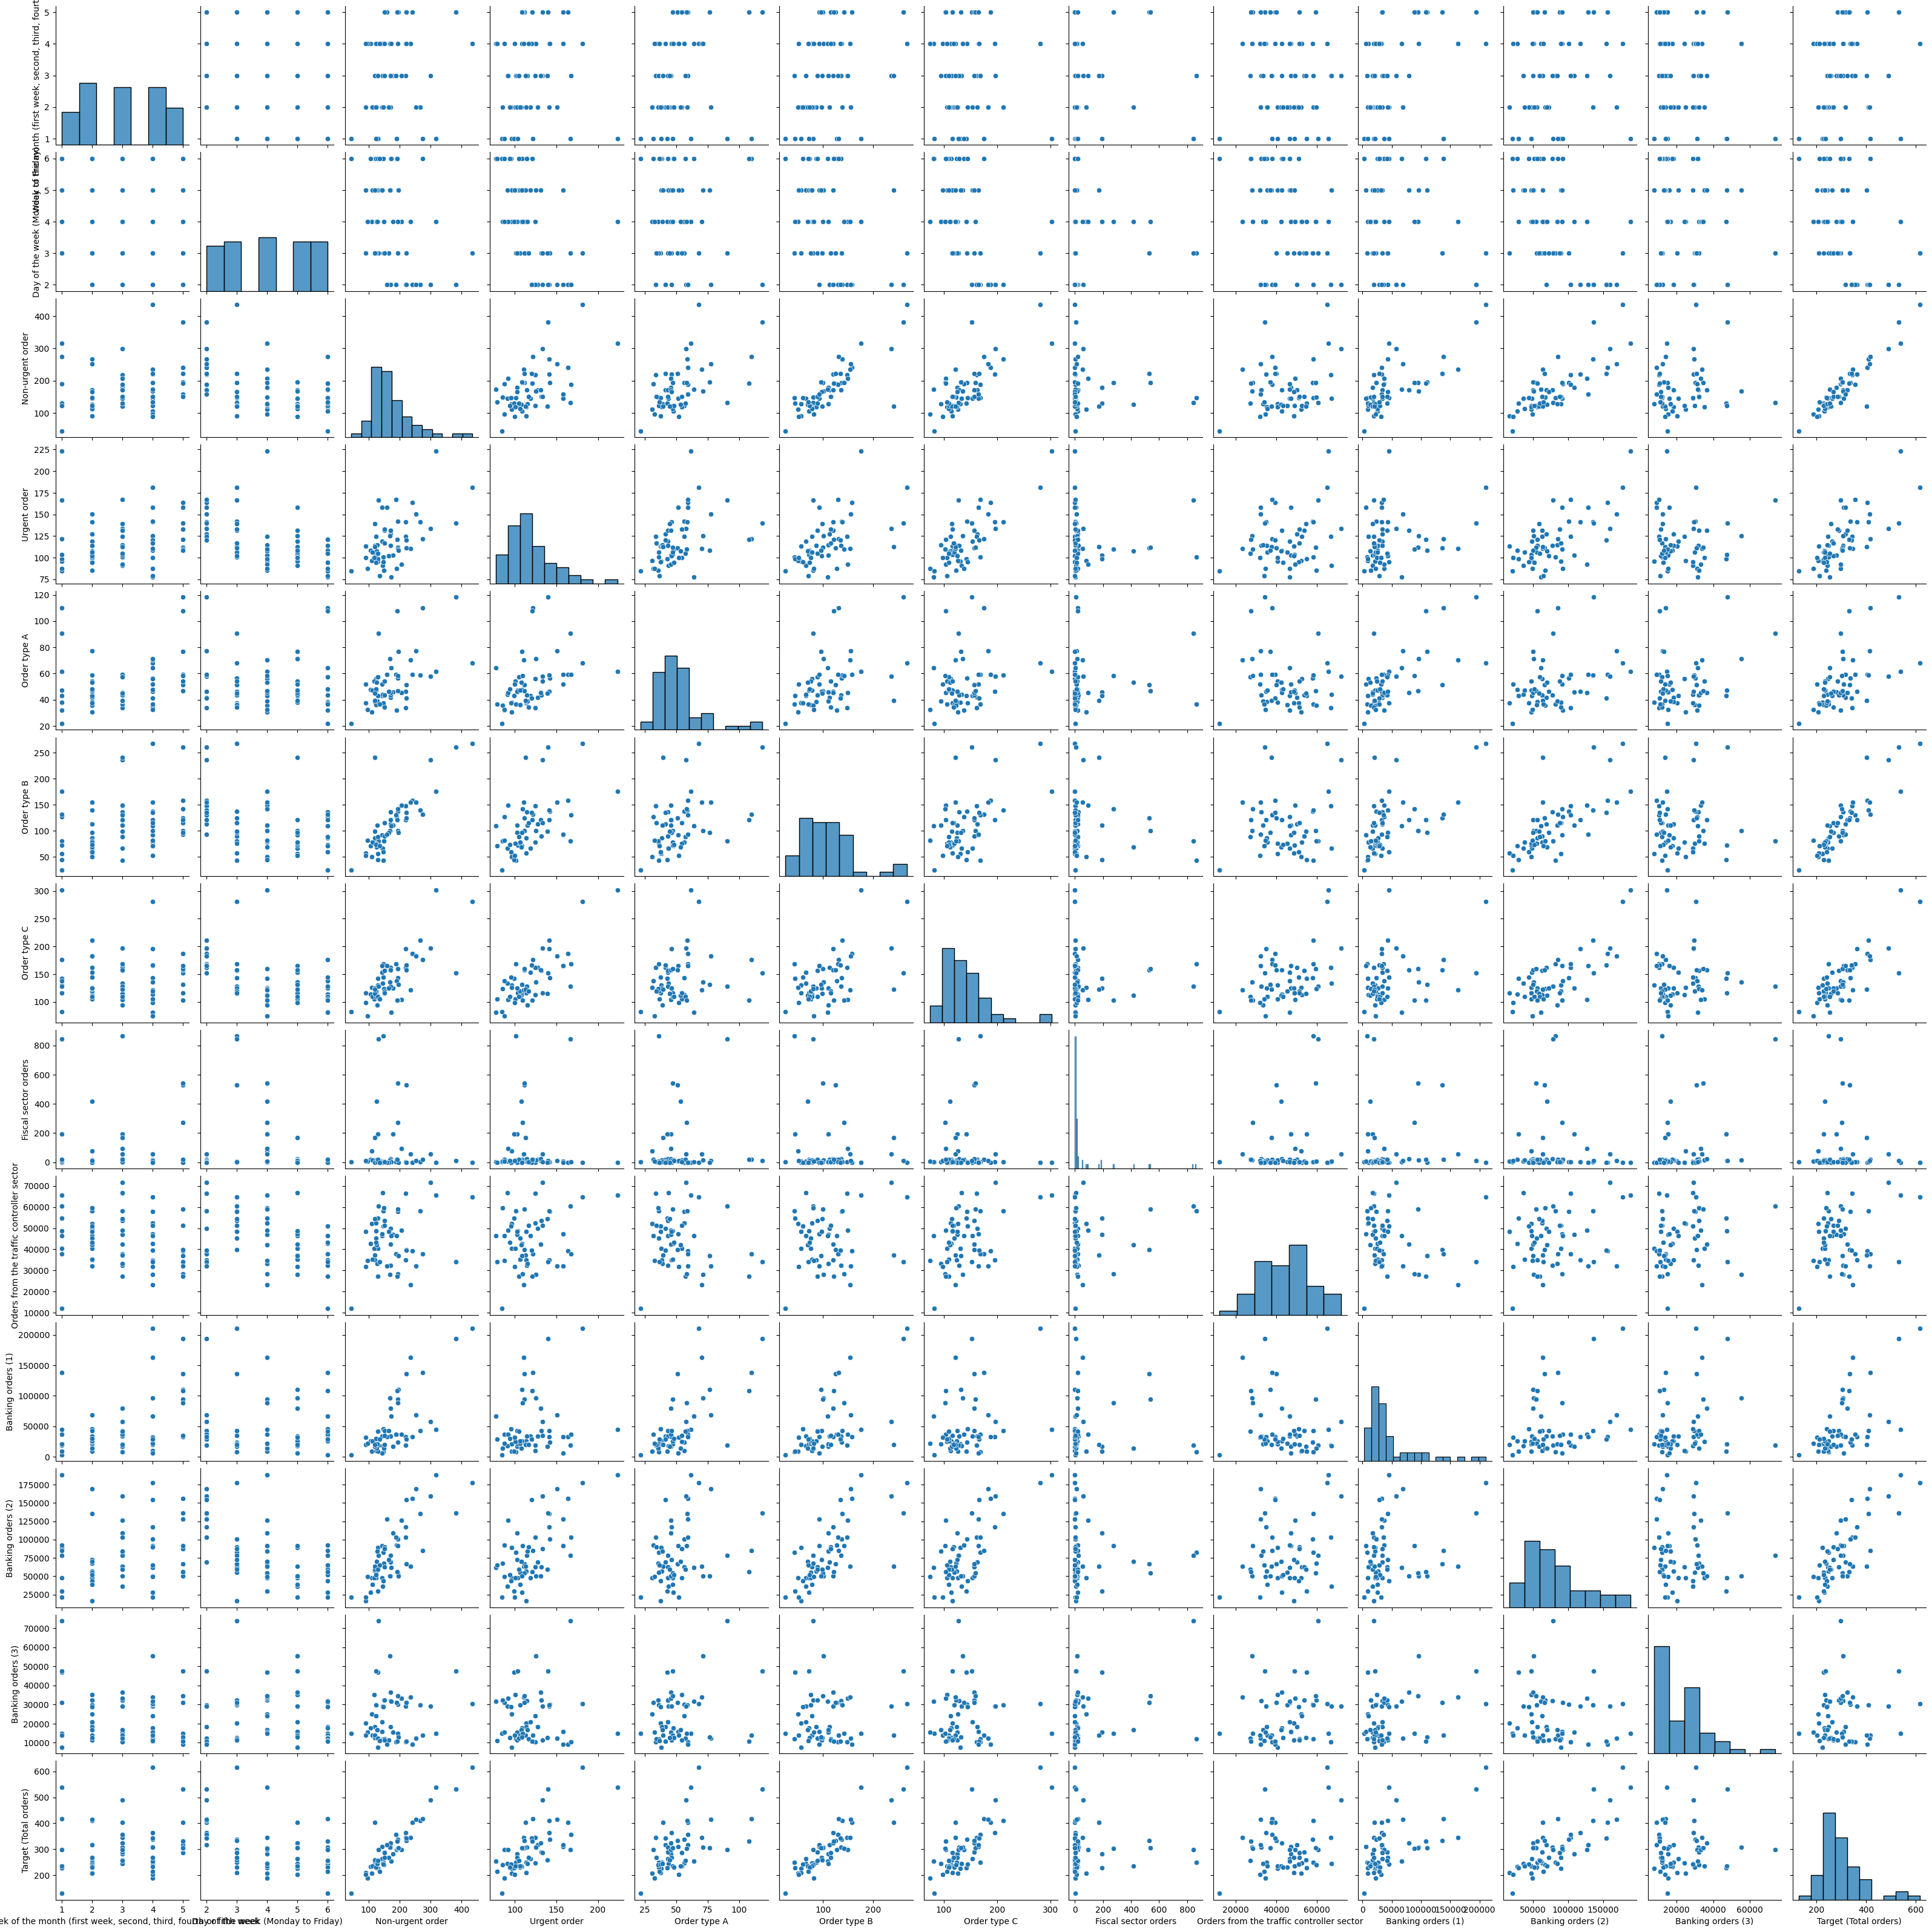

In [137]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [138]:
cols_num = ['Order type A', 'Order type B', 'Order type C']

correlation = df.corr().loc[cols_num, cols_num]
correlation

,Order type A,Order type B,Order type C
Order type A,1.000000,0.438734,0.218651
Order type B,0.438734,1.000000,0.523598
Order type C,0.218651,0.523598,1.000000


<AxesSubplot: >

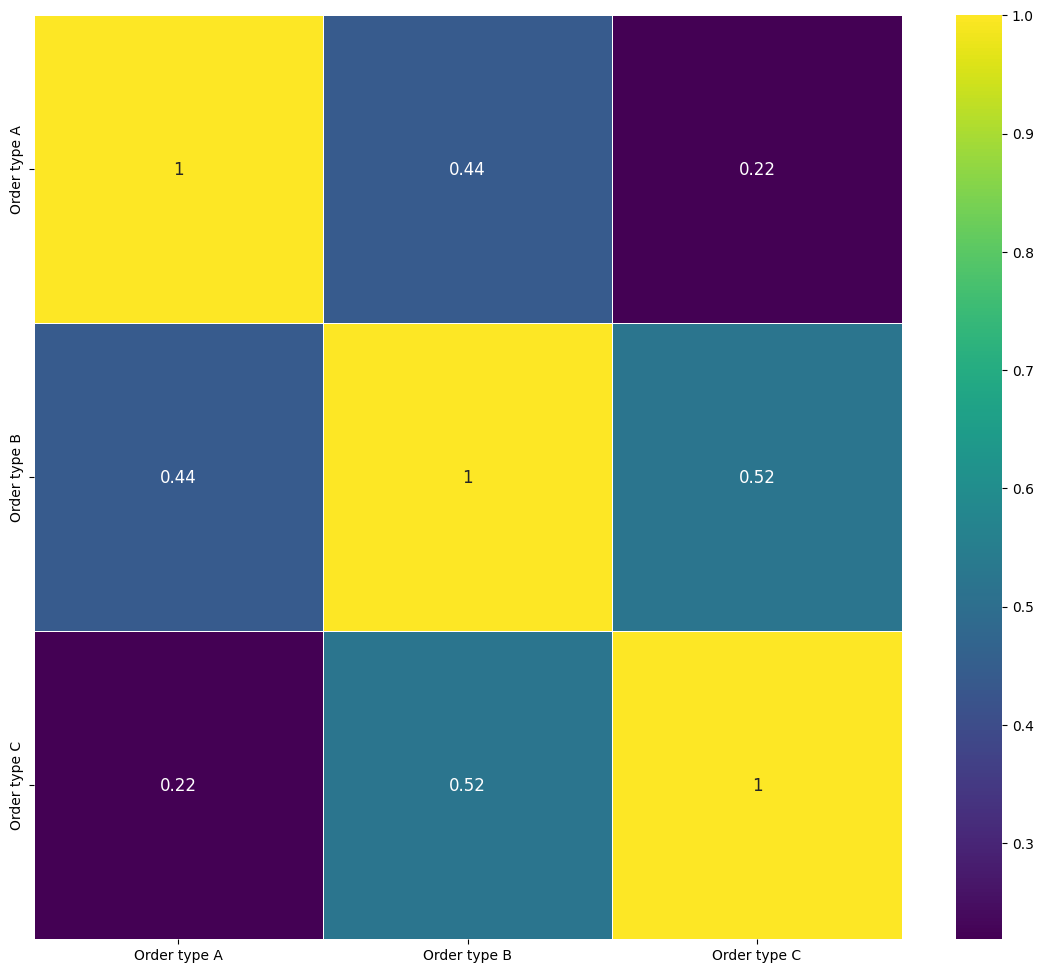

In [139]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [140]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
vif,10.327274,8.840013,860.147021,293.123332,58.661105,143.10596,374.666588,2.09118,54.714327,31.655509,79.960796,7.64887


# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

<AxesSubplot: ylabel='Density'>

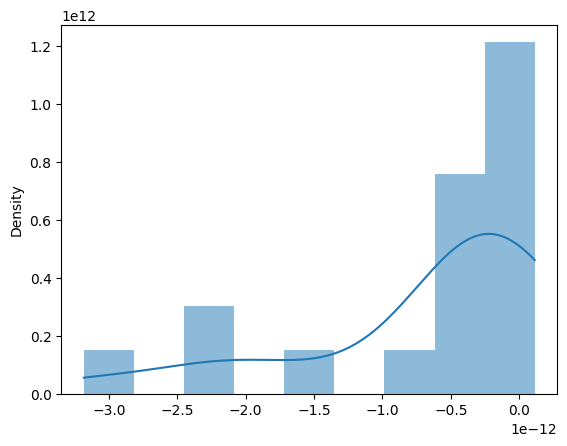

In [141]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

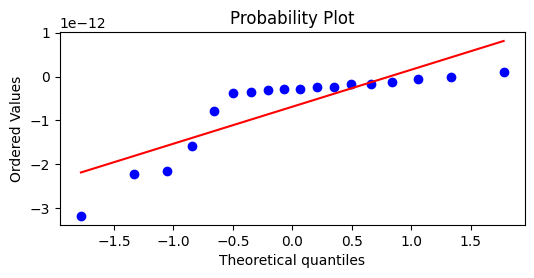

In [142]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [143]:
np.mean(residual)

-6.884369617586748e-13

# Гомоскедантичность
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. Предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация нас не устраивает. Нам важно, чтобы качество модели было одно и то же при любых значениях независимой переменной.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

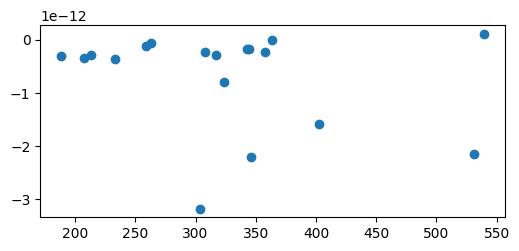

In [144]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

0     1.136868e-13
5    -3.410605e-13
36   -2.160050e-12
45   -2.273737e-13
13    0.000000e+00
54   -2.842171e-13
33   -2.216893e-12
48   -1.591616e-12
12   -2.273737e-13
57   -3.183231e-12
46   -1.136868e-13
50   -1.705303e-13
31   -7.958079e-13
3    -2.842171e-13
52   -3.126388e-13
17   -3.694822e-13
8    -1.705303e-13
6    -5.684342e-14
dtype: float64


C:\Users\R\AppData\Local\Temp\ipykernel_4428\4167846059.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


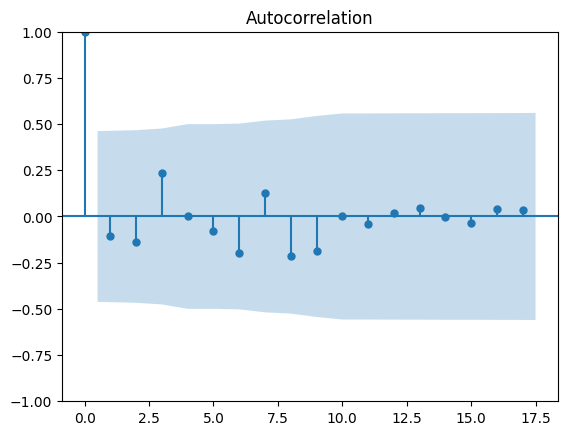

In [145]:
print(residual)
acf = smt.graphics.plot_acf(residual, lags=17 , alpha=0.05)
acf.show()


## Матрицами ([статья](https://habr.com/en/post/479398/))

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [146]:
# тут будет код
mtr = np.asmatrix(data=residual, dtype=float)
print(mtr)
# grd = np.gradient(np.ndarray(*mtr))
# print(grd)

[[ 1.13686838e-13 -3.41060513e-13 -2.16004992e-12 -2.27373675e-13
   0.00000000e+00 -2.84217094e-13 -2.21689334e-12 -1.59161573e-12
  -2.27373675e-13 -3.18323146e-12 -1.13686838e-13 -1.70530257e-13
  -7.95807864e-13 -2.84217094e-13 -3.12638804e-13 -3.69482223e-13
  -1.70530257e-13 -5.68434189e-14]]


## Градиентным спуском  ([статья](https://habr.com/en/post/474602/))

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$

Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [147]:
# тут будет код

# Тут будет описание

# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей